In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyspark as ps
import os

plt.style.use('fivethirtyeight')

In [65]:
spark = (ps.sql.SparkSession
        .builder
        .master('local[4]')
        .appName('capstone1')
        .getOrCreate()
        )
sc = spark.sparkContext

In [4]:
sc

<SparkContext master=local[4] appName=capstone1>

In [5]:
from pyspark.sql.types import *

In [6]:
schema = StructType([
    StructField('ResponseID', StringType(), True),
    StructField('ExtendedSessionID', StringType(), True),
    StructField('UserID', StringType(), True),
    StructField('ScenarioOrder', IntegerType(), True),
    StructField('Intervention', IntegerType(), True),
    StructField('PedPed', IntegerType(), True),
    StructField('Barrier', IntegerType(), True),
    StructField('CrossingSignal', IntegerType(), True),
    StructField('AttributeLevel', StringType(), True),
    StructField('ScenarioTypeStrict', StringType(), True),
    StructField('ScenarioType', StringType(), True),
    StructField('DefaultChoice', StringType(), True),
    StructField('NonDefaultChoice', StringType(), True),
    StructField('DefaultChoiceOmission', IntegerType(), True),
    StructField('NumberOfCharacters', IntegerType(), True),
    StructField('DiffNumberOfCharacters', IntegerType(), True),
    StructField('Saved', IntegerType(), True),
    StructField('Template', StringType(), True),
    StructField('DescriptionShown', IntegerType(), True),
    StructField('LeftHand', IntegerType(), True),
    StructField('UserCountry3', StringType(), True),
    StructField('Man', IntegerType(), True),
    StructField('Woman', IntegerType(), True),
    StructField('Pregnant', IntegerType(), True),
    StructField('Stroller', IntegerType(), True),
    StructField('OldMan', IntegerType(), True),
    StructField('OldWoman', IntegerType(), True),
    StructField('Boy', IntegerType(), True),
    StructField('Girl', IntegerType(), True),
    StructField('Homeless', IntegerType(), True),
    StructField('LargeWoman', IntegerType(), True),
    StructField('LargeMan', IntegerType(), True),
    StructField('Criminal', IntegerType(), True),
    StructField('MaleExecutive', IntegerType(), True),
    StructField('FemaleExecutive', IntegerType(), True),
    StructField('FemaleAthlete', IntegerType(), True),
    StructField('MaleAthlete', IntegerType(), True),
    StructField('FemaleDoctore', IntegerType(), True),
    StructField('MaleDoctor', IntegerType(), True),
    StructField('Dog', IntegerType(), True),
    StructField('Cat', IntegerType(), True),  
])

In [7]:
df = spark.read.csv('./data/SharedResponses.csv', schema=schema, header=True)

In [8]:
df.printSchema()

root
 |-- ResponseID: string (nullable = true)
 |-- ExtendedSessionID: string (nullable = true)
 |-- UserID: string (nullable = true)
 |-- ScenarioOrder: integer (nullable = true)
 |-- Intervention: integer (nullable = true)
 |-- PedPed: integer (nullable = true)
 |-- Barrier: integer (nullable = true)
 |-- CrossingSignal: integer (nullable = true)
 |-- AttributeLevel: string (nullable = true)
 |-- ScenarioTypeStrict: string (nullable = true)
 |-- ScenarioType: string (nullable = true)
 |-- DefaultChoice: string (nullable = true)
 |-- NonDefaultChoice: string (nullable = true)
 |-- DefaultChoiceOmission: integer (nullable = true)
 |-- NumberOfCharacters: integer (nullable = true)
 |-- DiffNumberOfCharacters: integer (nullable = true)
 |-- Saved: integer (nullable = true)
 |-- Template: string (nullable = true)
 |-- DescriptionShown: integer (nullable = true)
 |-- LeftHand: integer (nullable = true)
 |-- UserCountry3: string (nullable = true)
 |-- Man: integer (nullable = true)
 |-- Wom

In [456]:
df.count()

70332355

### Create SQL table 'mm'

In [9]:
df.createOrReplaceTempView('mm')

In [10]:
query = '''
SELECT *
FROM mm
LIMIT 10
'''

spark.sql(query).toPandas()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6999801415950060,7,0,0,0,1,Fit,Fitness,...,0,0,0,0,1,2,0,0,0,0
1,2222sJk4DcoqXXi98,1043988516_3525281295.0,3525281295,2,0,0,0,0,Rand,Random,...,0,0,1,0,0,0,0,0,0,0
2,2223CNmvTr2Coj4wp,-1613944085_422160228641876.0,422160228641876,10,0,1,0,1,Female,Gender,...,0,0,0,1,0,0,0,0,0,0
3,2223Xu54ufgjcyMR3,1425316635_327833569077076.0,327833569077076,11,0,0,1,0,Old,Age,...,0,0,0,0,0,0,0,0,0,0
4,2223jMWDEGNeszivb,-1683127088_785070916172117.0,785070916172117,8,0,1,0,2,More,Utilitarian,...,0,1,1,0,1,0,0,0,1,0
5,22244vvSZfn4J9Zop,1525185249_1436495773909467.0,1436495773909470,11,0,0,1,0,Low,Social Status,...,0,0,0,0,0,0,0,0,0,0
6,2224H2QBFKNsMmRQc,1661661891_4304873273230329.0,4304873273230330,11,0,1,0,0,Female,Gender,...,0,0,0,1,0,0,1,0,0,0
7,2224YxTZcu4sJqTSD,-887960483_174929057557052.0,174929057557052,6,0,0,0,2,Hoomans,Species,...,0,0,0,0,1,1,0,0,0,0
8,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9992828917431900,7,0,0,1,0,Less,Utilitarian,...,0,0,0,0,1,0,1,0,0,1
9,2224kBG72574tbZD3,737909459_839962439872333.0,839962439872333,12,0,0,1,0,Old,Age,...,0,0,0,0,0,0,0,0,0,0


## Scenario types

In [75]:
query = '''
SELECT ScenarioType, DefaultChoice, count(*) as scen_count
FROM mm
WHERE ScenarioType <> "None"
GROUP BY ScenarioType, DefaultChoice
ORDER BY scen_count DESC
'''

scenarios = spark.sql(query).toPandas()

/opt/conda/lib/python3.8/socket.py:740: ResourceWarning: unclosed <socket.socket fd=49, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 49402), raddr=('127.0.0.1', 35479)>
  self._sock = None


In [76]:
scenarios

,ScenarioType,DefaultChoice,scen_count
0,Utilitarian,More,12527288
1,Species,Hoomans,12044382
2,Gender,Male,11967330
3,Age,Young,11583880
4,Fitness,Fit,10811634
5,Random,None,7507350
6,Social Status,High,3890417


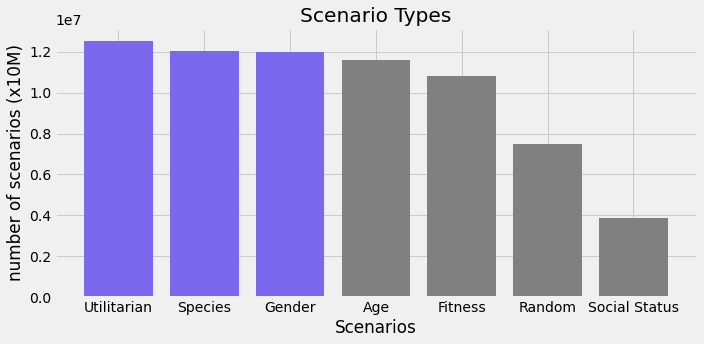

In [90]:
colors_scen = ['grey' for c in range(7)]
colors_scen[0] = 'mediumslateblue'
colors_scen[1] = 'mediumslateblue'
colors_scen[2] = 'mediumslateblue'

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(scenarios['ScenarioType'], scenarios['scen_count'], color=colors_scen)
ax.set_title('Scenario Types')
ax.set_xlabel('Scenarios')
ax.set_ylabel('number of scenarios (x10M)')
fig.tight_layout()

### Change the maximum number or rows and columns displayed from a Pandas dataframe

In [13]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Get country information

In [11]:
country_schema = StructType([
    StructField('ISO', StringType(), True),
    StructField('ISO3', StringType(), True),
    StructField('ISO+AC0-Numeric', IntegerType(), True),
    StructField('fips', StringType(), True),
    StructField('Country', StringType(), True),
    StructField('Capital', StringType(), True),
    StructField('Area', FloatType(), True),
    StructField('Population', IntegerType(), True),
    StructField('Continent', StringType(), True),
    StructField('tld', StringType(), True),
    StructField('CurrencyCode', StringType(), True),
    StructField('CurrencyName', StringType(), True),
    StructField('Phone', StringType(), True),
    StructField('Postal Code Format', StringType(), True),
    StructField('Postal Code Regex', StringType(), True),
    StructField('Languages', StringType(), True),
    StructField('geonameid', StringType(), True),
    StructField('neighbours', StringType(), True),
    StructField('EquivalentFipsCode', StringType(), True),
])

In [12]:
country_info = spark.read.csv('data/countryInfo.csv', schema=country_schema, header=True)

In [13]:
country_info.printSchema()

root
 |-- ISO: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- ISO+AC0-Numeric: integer (nullable = true)
 |-- fips: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Capital: string (nullable = true)
 |-- Area: float (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Continent: string (nullable = true)
 |-- tld: string (nullable = true)
 |-- CurrencyCode: string (nullable = true)
 |-- CurrencyName: string (nullable = true)
 |-- Phone: string (nullable = true)
 |-- Postal Code Format: string (nullable = true)
 |-- Postal Code Regex: string (nullable = true)
 |-- Languages: string (nullable = true)
 |-- geonameid: string (nullable = true)
 |-- neighbours: string (nullable = true)
 |-- EquivalentFipsCode: string (nullable = true)



In [ ]:
country_info.show()

In [18]:
country_info.createOrReplaceTempView('country')

In [19]:
query = '''
SELECT *
FROM country c

'''
spark.sql(query).toPandas()

,ISO,ISO3,ISO+AC0-Numeric,fips,Country,Capital,Area,Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Postal Code Format,Postal Code Regex,Languages,geonameid,neighbours,EquivalentFipsCode
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,84000,EU,.ad,EUR,Euro,376,AD+ACMAIwAj-,+AF4-(?:AD)+ACo-(+AFw-d+AHs-3+AH0-)+ACQ-,ca,3041565,ES,FR
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,4975593,AS,.ae,AED,Dirham,971,None,None,ar+AC0-AE,fa,en,hi
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,29121286,AS,.af,AFN,Afghani,93,None,None,fa+AC0-AF,ps,uz+AC0-AF,tk
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,86754,NA,.ag,XCD,Dollar,+//0-268,None,None,en+AC0-AG,3576396,None,None
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA,.ai,XCD,Dollar,+//0-264,None,None,en+AC0-AI,3573511,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,49000000,AF,.za,ZAR,Rand,27,+ACMAIwAjACM-,+AF4-(+AFw-d+AHs-4+AH0-)+ACQ-,zu,xh,af,nso
248,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,13460305,AF,.zm,ZMW,Kwacha,260,+ACMAIwAjACMAIw-,+AF4-(+AFw-d+AHs-5+AH0-)+ACQ-,en+AC0-ZM,bem,loz,lun
249,ZW,ZWE,716,ZI,Zimbabwe,Harare,390580.0,13061000,AF,.zw,ZWL,Dollar,263,None,None,en+AC0-ZW,sn,nr,nd
250,CS,SCG,891,YI,Serbia and Montenegro,Belgrade,102350.0,10829175,EU,.cs,RSD,Dinar,381,+ACMAIwAjACMAIw-,+AF4-(+AFw-d+AHs-5+AH0-)+ACQ-,cu,hu,sq,sr


### Move limited # of rows to a Pandas DF for EDA

In [12]:
pdf = df.limit(100_000).toPandas()

In [434]:
pdf.head(20)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceOmission,NumberOfCharacters,DiffNumberOfCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6999801415950060,7,0,0,0,1,Fit,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,1,Desktop,1.0,1.0,USA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2222sJk4DcoqXXi98,1043988516_3525281295.0,3525281295,2,0,0,0,0,Rand,Random,Random,None,None,NaN,1.0,0.0,1,Desktop,0.0,1.0,BEL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2223CNmvTr2Coj4wp,-1613944085_422160228641876.0,422160228641876,10,0,1,0,1,Female,Gender,Gender,Male,Female,0.0,4.0,0.0,1,Mobile,0.0,0.0,ISR,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2223Xu54ufgjcyMR3,1425316635_327833569077076.0,327833569077076,11,0,0,1,0,Old,Age,Age,Young,Old,0.0,5.0,0.0,0,Desktop,1.0,0.0,MEX,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2223jMWDEGNeszivb,-1683127088_785070916172117.0,785070916172117,8,0,1,0,2,More,Utilitarian,Utilitarian,More,Less,1.0,5.0,2.0,0,Mobile,0.0,0.0,CHE,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,22244vvSZfn4J9Zop,1525185249_1436495773909467.0,1436495773909470,11,0,0,1,0,Low,Social Status,Social Status,High,Low,0.0,2.0,0.0,0,Desktop,1.0,1.0,RUS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2224H2QBFKNsMmRQc,1661661891_4304873273230329.0,4304873273230330,11,0,1,0,0,Female,Gender,Gender,Male,Female,0.0,5.0,0.0,0,Desktop,0.0,1.0,TUR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,2224YxTZcu4sJqTSD,-887960483_174929057557052.0,174929057557052,6,0,0,0,2,Hoomans,Species,Species,Hoomans,Pets,1.0,5.0,0.0,1,Desktop,1.0,0.0,CAN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9992828917431900,7,0,0,1,0,Less,Utilitarian,Utilitarian,More,Less,0.0,4.0,1.0,1,Desktop,1.0,0.0,USA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,2224kBG72574tbZD3,737909459_839962439872333.0,839962439872333,12,0,0,1,0,Old,Age,Age,Young,Old,0.0,3.0,0.0,1,Desktop,0.0,1.0,MEX,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseID              100000 non-null  object 
 1   ExtendedSessionID       100000 non-null  object 
 2   UserID                  99991 non-null   object 
 3   ScenarioOrder           100000 non-null  int32  
 4   Intervention            100000 non-null  int32  
 5   PedPed                  100000 non-null  int32  
 6   Barrier                 100000 non-null  int32  
 7   CrossingSignal          100000 non-null  int32  
 8   AttributeLevel          100000 non-null  object 
 9   ScenarioTypeStrict      100000 non-null  object 
 10  ScenarioType            99999 non-null   object 
 11  DefaultChoice           89462 non-null   object 
 12  NonDefaultChoice        89462 non-null   object 
 13  DefaultChoiceOmission   89462 non-null   float64
 14  NumberOfCharacters   

In [15]:
pdf.describe()

,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,DefaultChoiceOmission,NumberOfCharacters,DiffNumberOfCharacters,Saved,DescriptionShown,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
count,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,89462.000000,99999.000000,99999.000000,100000.00000,86891.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,6.741770,0.0,0.450480,0.215510,0.685410,0.492131,3.078281,0.570146,0.46393,0.274608,...,0.158432,0.059071,0.105701,0.106531,0.192102,0.189082,0.097831,0.096021,0.174862,0.172632
std,3.780925,0.0,0.497544,0.411178,0.856534,0.499941,1.468290,1.149558,0.49870,0.446319,...,0.444673,0.254876,0.345673,0.347424,0.523319,0.519744,0.335144,0.331123,0.571481,0.564407
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,0.0,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,0.0,1.000000,1.000000,2.000000,1.000000,5.000000,4.000000,1.00000,1.000000,...,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000


In [148]:
response = pdf_t[0]['ResponseID']
response

'2222bRQqBTZ6dLnPH'

In [152]:
user = pdf_t[0]['UserID']
user

'6999801415950060'

In [190]:
pdf[pdf['ResponseID']==response]

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceOmission,NumberOfCharacters,DiffNumberOfCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6999801415950060,7,0,0,0,1,Fit,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,1,Desktop,1.0,1.0,USA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [153]:
pdf[pdf['UserID']==user]

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6999801415950060,7,0,0,0,1,Fit,Fitness,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [155]:
pdf_survey[pdf_survey['UserID']==user]

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious


## Survey data

In [14]:
survey_schema = StructType([
    StructField('ResponseID', StringType(), True),
    StructField('ExtendedSessionID', StringType(), True),
    StructField('UserID', StringType(), True),
    StructField('ScenarioOrder', IntegerType(), True),
    StructField('Intervention', IntegerType(), True),
    StructField('PedPed', IntegerType(), True),
    StructField('Barrier', IntegerType(), True),
    StructField('CrossingSignal', IntegerType(), True),
    StructField('AttributeLevel', StringType(), True),
    StructField('ScenarioTypeStrict', StringType(), True),
    StructField('ScenarioType', StringType(), True),
    StructField('DefaultChoice', StringType(), True),
    StructField('NonDefaultChoice', StringType(), True),
    StructField('DefaultChoiceOmission', IntegerType(), True),
    StructField('NumberOfCharacters', IntegerType(), True),
    StructField('DiffNumberOfCharacters', IntegerType(), True),
    StructField('Saved', IntegerType(), True),
    StructField('Template', StringType(), True),
    StructField('DescriptionShown', IntegerType(), True),
    StructField('LeftHand', IntegerType(), True),
    StructField('UserCountry3', StringType(), True),
    StructField('Review_age', IntegerType(), True),
    StructField('Review_education', StringType(), True),
    StructField('Review_gender', StringType(), True),
    StructField('Review_income', IntegerType(), True),
    StructField('Review_political', IntegerType(), True),
    StructField('Review_religious', IntegerType(), True),
])

In [15]:
df_survey = spark.read.csv('./data/SharedResponsesSurvey.csv', schema=survey_schema, header=True)

In [16]:
df_survey.printSchema()

root
 |-- ResponseID: string (nullable = true)
 |-- ExtendedSessionID: string (nullable = true)
 |-- UserID: string (nullable = true)
 |-- ScenarioOrder: integer (nullable = true)
 |-- Intervention: integer (nullable = true)
 |-- PedPed: integer (nullable = true)
 |-- Barrier: integer (nullable = true)
 |-- CrossingSignal: integer (nullable = true)
 |-- AttributeLevel: string (nullable = true)
 |-- ScenarioTypeStrict: string (nullable = true)
 |-- ScenarioType: string (nullable = true)
 |-- DefaultChoice: string (nullable = true)
 |-- NonDefaultChoice: string (nullable = true)
 |-- DefaultChoiceOmission: integer (nullable = true)
 |-- NumberOfCharacters: integer (nullable = true)
 |-- DiffNumberOfCharacters: integer (nullable = true)
 |-- Saved: integer (nullable = true)
 |-- Template: string (nullable = true)
 |-- DescriptionShown: integer (nullable = true)
 |-- LeftHand: integer (nullable = true)
 |-- UserCountry3: string (nullable = true)
 |-- Review_age: integer (nullable = true)
 

In [19]:
df_survey.count()

11286141

## Survey data to SQL table

In [17]:
df_survey.createOrReplaceTempView('survey')

In [18]:
query = '''
SELECT *
FROM survey
LIMIT 10
'''

spark.sql(query).toPandas()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6968366610050750,13,0,0,0,0,Female,Gender,...,Desktop,0,0,RUS,32,bachelor,male,35000,NaN,NaN
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6968366610050750,8,0,1,0,0,Fat,Fitness,...,Desktop,0,0,RUS,32,bachelor,male,35000,NaN,NaN
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6968366610050750,2,0,0,0,2,Young,Age,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6968366610050750,1,0,1,0,2,Pets,Species,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6968366610050750,5,0,1,0,0,Fit,Fitness,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
5,m4c66qhwmnqcCzxdX,-2147481563_6968366610050747.0,6968366610050750,4,0,0,0,1,Rand,Random,...,Desktop,0,0,RUS,32,bachelor,male,35000,NaN,NaN
6,nej5j6wM9YmiGHgA7,-2147481563_6968366610050747.0,6968366610050750,6,0,0,0,1,More,Utilitarian,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
7,np7BxSz2LhNqXMAHj,-2147481563_6968366610050747.0,6968366610050750,3,0,1,0,0,Old,Age,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
8,sibXCK6jno3M94BnR,-2147481563_6968366610050747.0,6968366610050750,12,0,1,0,1,Hoomans,Species,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
9,w6kv36ap7rPR6FT4N,-2147481563_6968366610050747.0,6968366610050750,10,0,1,0,0,Low,Social Status,...,Desktop,0,0,RUS,32,bachelor,male,35000,NaN,NaN


In [164]:
# query = '''
#     SELECT *
#     FROM mm m
#     JOIN survey s ON m.ResponseID = s.ResponseID
#     WHERE m.UserCountry3 = 'HUN'
#     ORDER BY m.UserID, m.ResponseID, m.ScenarioOrder
#     '''

# hun = spark.sql(query).toPandas()

In [19]:
# query = '''
#     SELECT *
#     FROM survey
#     WHERE UserCountry3 IN ('HUN', 'USA') and ScenarioType IN ('Utilitarian', 'Species', 'Gender')
#     '''

# hun_usa_survey = spark.sql(query).toPandas()

## Save USA - Hungary survey results to csv - to avoid rerunning the query all the time

In [20]:
# hun_usa_survey.to_csv('data/hun_usa_survey.csv')

In [ ]:
# hun_usa_spark = spark.read.csv('data/hun_usa_survey.csv', schema=survey_schema, header=True)

In [21]:
hun_usa_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373252 entries, 0 to 1373251
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ResponseID              1373252 non-null  object 
 1   ExtendedSessionID       1373252 non-null  object 
 2   UserID                  1373252 non-null  object 
 3   ScenarioOrder           1373252 non-null  int32  
 4   Intervention            1373252 non-null  int32  
 5   PedPed                  1373252 non-null  int32  
 6   Barrier                 1373252 non-null  int32  
 7   CrossingSignal          1373252 non-null  int32  
 8   AttributeLevel          1373252 non-null  object 
 9   ScenarioTypeStrict      1373252 non-null  object 
 10  ScenarioType            1373252 non-null  object 
 11  DefaultChoice           1373252 non-null  object 
 12  NonDefaultChoice        1373252 non-null  object 
 13  DefaultChoiceOmission   1373252 non-null  int32  
 14  Nu

In [25]:
hun_usa_survey.groupby(['UserCountry3', 'ScenarioType', 'AttributeLevel']).mean()[['DefaultChoiceOmission', 'Saved']]

DefaultChoiceOmission     Saved
UserCountry3 ScenarioType AttributeLevel                                 
HUN          Gender       Female                       0.499974  0.592925
                          Male                         0.499974  0.407075
             Species      Hoomans                      0.495403  0.874324
                          Pets                         0.495403  0.125676
             Utilitarian  Less                         0.493701  0.199329
                          More                         0.493701  0.800671
USA          Gender       Female                       0.500906  0.576857
                          Male                         0.500906  0.423143
             Species      Hoomans                      0.499939  0.802158
                          Pets                         0.499939  0.197842
             Utilitarian  Less                         0.497808  0.196253
                          More                         0.497808  0.803747

In [26]:
hun_usa_survey.groupby(['UserCountry3']).count()['ResponseID']

UserCountry3
HUN     115372
USA    1257880
Name: ResponseID, dtype: int64

In [329]:
# hun.to_csv('data/hun_survey.csv')

In [344]:
# hun_spark = spark.read.csv('data/hun_survey.csv', schema=survey_schema, header=True)

## Move 1M rows to Pandas

In [31]:
pdf_survey = df_survey.limit(1_000_000).toPandas()

In [32]:
pdf_survey.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6968366610050750,13,0,0,0,0,Female,Gender,...,Desktop,0.0,0.0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6968366610050750,8,0,1,0,0,Fat,Fitness,...,Desktop,0.0,0.0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6968366610050750,2,0,0,0,2,Young,Age,...,Desktop,0.0,1.0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6968366610050750,1,0,1,0,2,Pets,Species,...,Desktop,0.0,1.0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6968366610050750,5,0,1,0,0,Fit,Fitness,...,Desktop,0.0,1.0,RUS,32.0,bachelor,male,35000.0,NaN,NaN


In [33]:
pdf_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ResponseID              1000000 non-null  object 
 1   ExtendedSessionID       1000000 non-null  object 
 2   UserID                  1000000 non-null  object 
 3   ScenarioOrder           1000000 non-null  int32  
 4   Intervention            1000000 non-null  int32  
 5   PedPed                  1000000 non-null  int32  
 6   Barrier                 1000000 non-null  int32  
 7   CrossingSignal          1000000 non-null  int32  
 8   AttributeLevel          1000000 non-null  object 
 9   ScenarioTypeStrict      1000000 non-null  object 
 10  ScenarioType            1000000 non-null  object 
 11  DefaultChoice           893795 non-null   object 
 12  NonDefaultChoice        893795 non-null   object 
 13  DefaultChoiceOmission   893795 non-null   float64
 14  Num

In [23]:
pdf_survey.describe()

,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,DefaultChoiceOmission,NumberOfCharacters,DiffNumberOfCharacters,Saved,DescriptionShown,LeftHand,Review_age,Review_income,Review_political,Review_religious
count,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,89408.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,8.831000e+04,39890.000000,19427.000000,44707.000000
mean,6.996900,0.0,0.452250,0.215570,0.687470,0.488782,3.082340,0.576780,0.459120,0.367880,0.539710,1.244872e+03,28390.824768,0.739589,0.101394
std,3.741394,0.0,0.497717,0.411219,0.857124,0.499877,1.462505,1.155421,0.498329,0.482231,0.498423,1.014213e+05,21504.906541,0.438870,0.301852
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9.300000e+01,5000.000000,0.000000,0.000000
25%,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.700000e+01,10000.000000,0.000000,0.000000
50%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.200000e+01,25000.000000,1.000000,0.000000
75%,10.000000,0.0,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,2.900000e+01,50000.000000,1.000000,0.000000
max,13.000000,0.0,1.000000,1.000000,2.000000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,8.698686e+06,80000.000000,1.000000,1.000000


In [24]:
pdf_survey.head(100)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6968366610050750,13,0,0,0,0,Female,Gender,...,Desktop,0,0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6968366610050750,8,0,1,0,0,Fat,Fitness,...,Desktop,0,0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6968366610050750,2,0,0,0,2,Young,Age,...,Desktop,0,1,RUS,32.0,bachelor,male,35000.0,NaN,NaN
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6968366610050750,1,0,1,0,2,Pets,Species,...,Desktop,0,1,RUS,32.0,bachelor,male,35000.0,NaN,NaN
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6968366610050750,5,0,1,0,0,Fit,Fitness,...,Desktop,0,1,RUS,32.0,bachelor,male,35000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BvaDuoe8sP5MNAPFy,-2147375306_1833363285875471.0,1833363285875470,6,0,1,0,2,Old,Age,...,Desktop,0,1,ESP,30.0,vocational,male,25000.0,NaN,0.0
96,Q48DsiEgSkA2o6qCN,-2147375306_1833363285875471.0,1833363285875470,7,0,1,0,1,Female,Gender,...,Desktop,0,0,ESP,30.0,vocational,male,25000.0,NaN,0.0
97,W2hZwB39823LJGMcM,-2147375306_1833363285875471.0,1833363285875470,1,0,1,0,2,Fat,Fitness,...,Desktop,1,1,ESP,30.0,vocational,male,25000.0,NaN,0.0
98,W97uxsAe9hEznriwx,-2147375306_1833363285875471.0,1833363285875470,3,0,0,0,1,Male,Gender,...,Desktop,1,1,ESP,30.0,vocational,male,25000.0,NaN,0.0


In [34]:
pdf_survey.groupby('UserCountry3').count()['ResponseID'].sort_values()

UserCountry3
SLE         9
MLI         9
MYT        10
COG        11
LIE        11
        ...  
GBR     54954
DEU     64406
FRA     78723
BRA    116896
USA    214716
Name: ResponseID, Length: 182, dtype: int64

In [35]:
pd.crosstab(pdf_survey['Review_education'], pdf_survey['Review_income'])

Review_income,5000.0,10000.0,15000.0,25000.0,35000.0,50000.0,80000.0
Review_education,,,,,,,
bachelor,18056,14704,17058,16682,21212,25050,9525
college,14900,10174,9938,8068,7748,5807,4864
default,465,301,332,443,239,486,268
graduate,10063,10507,14312,16287,21524,24741,12421
high,15011,9441,9263,7478,6593,4882,2267
others,2618,1663,1752,1518,1732,1706,1066
underHigh,5866,2659,2478,1978,1820,1819,1341
vocational,3257,2682,3623,2987,3107,2554,672


In [36]:
pdf_survey.groupby('Review_gender').count()[['UserID']]

,UserID
Review_gender,
default,97444
female,245495
male,634593
others,22468


In [37]:
unique_responses = pdf_survey.ResponseID.unique()
unique_users = pdf_survey.UserID.unique()
user_responses = round(len(unique_responses) / len(unique_users), 1)

print(f'# of unique responses: {len(unique_responses):,}')
print(f'# of unique users: {len(unique_users):,}')
print(f'Average # of responses per user: {user_responses}')

# of unique responses: 1,000,000
# of unique users: 86,193
Average # of responses per user: 11.6


In [38]:
# scenarios = pdf_survey.ScenarioType.unique()
scen_count = pdf_survey.groupby('ScenarioType').count()['ResponseID'].sort_values(ascending=False)

# strict_scenarios = pdf_survey.ScenarioTypeStrict.unique()
str_scen_count = pdf_survey.groupby('ScenarioTypeStrict').count()['ResponseID'].sort_values(ascending=False)

scenarios_match = pdf_survey[pdf_survey['ScenarioType']==pdf_survey['ScenarioTypeStrict']]
# scenarios_match.groupby('ScenarioType').count()['ResponseID'].sort_values(ascending=False)
scenarios_dont_match = pdf_survey[pdf_survey['ScenarioType']!=pdf_survey['ScenarioTypeStrict']]
scenarios_dont_match.groupby('ScenarioType').count()['ResponseID'].sort_values(ascending=False)

ScenarioType
Random           27670
Utilitarian       5002
Species            658
Social Status      198
Gender             113
Fitness             88
Age                 81
Name: ResponseID, dtype: int64

In [39]:
scenarios_dont_match.head(100)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
12,8whe449weo7kTYSLk,-2147456672_5603843098383972.0,5603843098383970,12,0,1,0,0,Rand,Fitness,...,Desktop,1.0,0.0,BEL,23.0,graduate,male,35000.0,NaN,0.0
132,aqoZT9wCiSnpCzK3B,-2147366592_2142792677983374.0,2142792677983370,13,0,1,0,0,Rand,Fitness,...,Desktop,0.0,0.0,USA,NaN,default,default,NaN,0.0,NaN
134,cNfwBR8K5JTT9NbLc,-2147366592_2142792677983374.0,2142792677983370,3,0,1,0,1,Rand,Age,...,Desktop,1.0,0.0,USA,NaN,default,default,NaN,0.0,NaN
178,hzgh8FKeHDPPRJCYG,-2147297390_8206457376183196.0,8206457376183200,8,0,0,0,2,More,Random,...,Mobile,1.0,0.0,DEU,16.0,others,female,NaN,1.0,1.0
207,coeKBRzLL5kBabhah,-2147283477_4935560482617452.0,4935560482617450,3,0,1,0,0,Rand,Fitness,...,Mobile,0.0,1.0,CHE,22.0,college,male,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,vd4Gey5XNfiAzXzQ6,-2145080796_7548344059462528.0,7548344059462530,13,0,0,1,0,Rand,Fitness,...,Desktop,0.0,0.0,USA,17.0,high,default,NaN,NaN,NaN
3210,WrYDtYifGvXoe7XTn,-2145009435_9197062104162424.0,9197062104162430,2,0,1,0,2,Rand,Fitness,...,Desktop,0.0,1.0,AUS,17.0,high,male,50000.0,NaN,NaN
3229,J7PZuzsASjHT8yj3R,-2145002310_4054666529090669.0,4054666529090670,7,0,0,1,0,Rand,Fitness,...,Mobile,0.0,0.0,USA,47.0,graduate,male,15000.0,0.0,1.0
3237,KXNaHu3ofTL7DJyk5,-2144998827_3257658186550287.0,3257658186550290,7,0,0,0,2,Rand,Fitness,...,Mobile,0.0,0.0,FRA,17.0,high,male,NaN,NaN,0.0


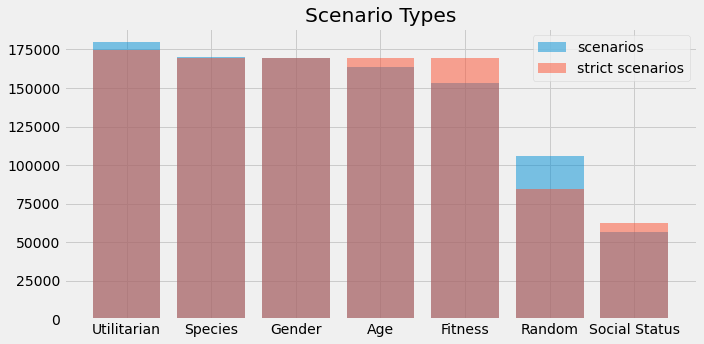

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(scen_count.index, scen_count, label='scenarios', alpha=0.5)
ax.bar(str_scen_count.index, str_scen_count, label='strict scenarios', alpha=0.5)
ax.legend()
ax.set_title('Scenario Types')
fig.tight_layout()

country_count = pdf_survey.groupby('UserCountry3').count()['ResponseID'].sort_values(ascending=False)
colors = ['grey' for c in range(20)]
colors[0] = 'b'
colors[12] = 'g'

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(country_count.index[:20], country_count[:20], color=colors)
ax.set_title('Survey responses by country')
ax.set_ylabel('# of survey responses')
ax.set_xlabel('country')
fig.tight_layout()

## Combine survey data with country info

In [347]:
# query = '''
# SELECT c.ISO3, c.Country, c.Capital, c.Area, c.Population, c.Continent, count(s.ResponseID) as responses
# FROM survey s
# JOIN country c ON s.UserCountry3 = c.ISO3
# GROUP BY c.ISO3, c.Country, c.Capital, c.Area, c.Population, c.Continent
# ORDER BY c.ISO3
# '''

# country_survey_df = spark.sql(query).toPandas()

In [349]:
# country_survey_df.to_csv('data/country_survey_responses.csv')

In [351]:
country_survey_responses = pd.read_csv('data/country_survey_responses.csv')

In [399]:
country_survey_responses['participation_rate'] = country_survey_responses['responses'] / country_survey_responses['Population'] * 100

In [400]:
country_survey_responses.sort_values('responses', ascending=False).head(12)

,Unnamed: 0,ISO3,Country,Capital,Area,Population,Continent,responses,participation_rate
203,203,USA,United States,Washington,9629091.0,310232863,NaN,2416717,0.779001
29,29,BRA,Brazil,Brasilia,8511965.0,201103330,SA,1324457,0.658595
64,64,FRA,France,Paris,547030.0,64768389,EU,901478,1.391849
51,51,DEU,Germany,Berlin,357021.0,81802257,EU,713192,0.871849
68,68,GBR,United Kingdom,London,244820.0,62348447,EU,624528,1.001674
168,168,RUS,Russia,Moscow,17100000.0,140702000,EU,448599,0.318829
101,101,JPN,Japan,Tokyo,377835.0,127288000,AS,382244,0.300299
33,33,CAN,Canada,Ottawa,9984670.0,33679000,NaN,380282,1.129137
97,97,ITA,Italy,Rome,301230.0,60340328,EU,320246,0.530733
12,12,AUS,Australia,Canberra,7686850.0,21515754,OC,249607,1.160113


In [401]:
country_part_rate = country_survey_responses[['Country', 'responses', 'participation_rate']].sort_values('responses', ascending=False).head(12)
country_part_rate

,Country,responses,participation_rate
203,United States,2416717,0.779001
29,Brazil,1324457,0.658595
64,France,901478,1.391849
51,Germany,713192,0.871849
68,United Kingdom,624528,1.001674
168,Russia,448599,0.318829
101,Japan,382244,0.300299
33,Canada,380282,1.129137
97,Italy,320246,0.530733
12,Australia,249607,1.160113


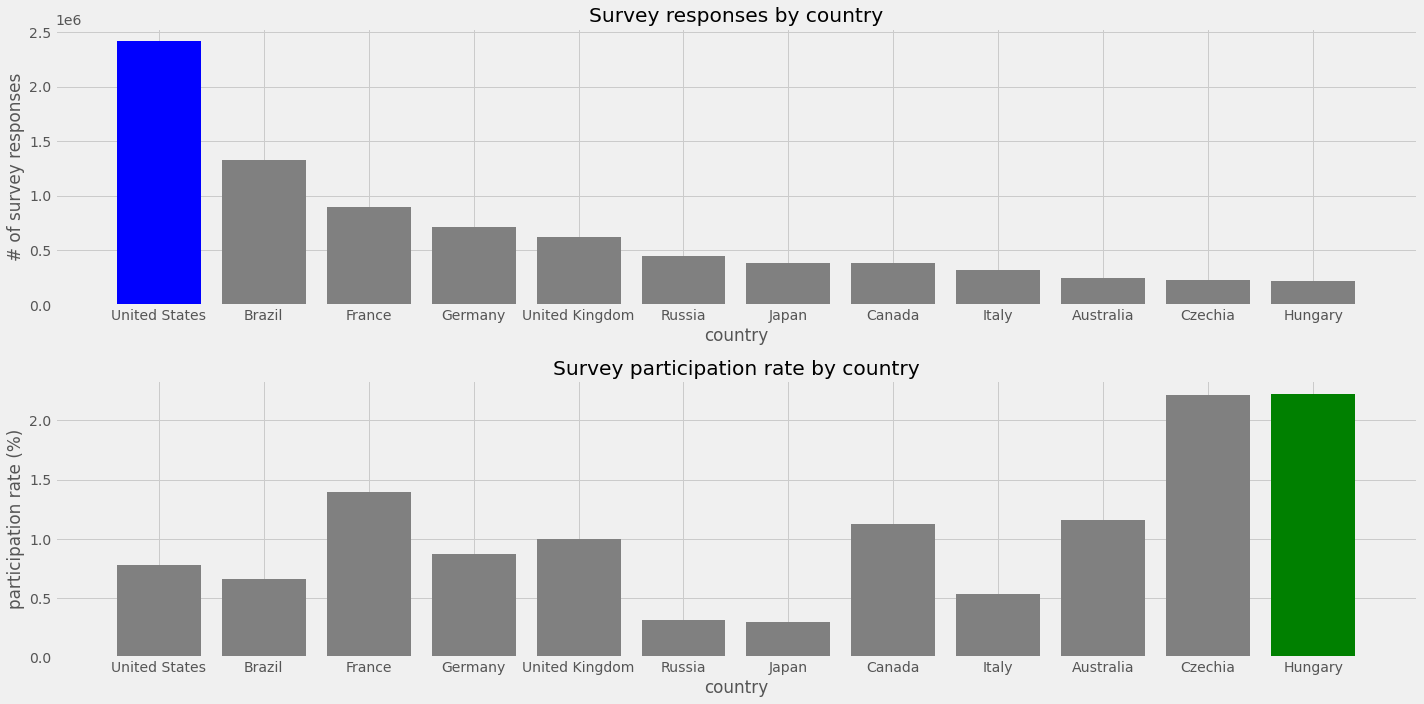

In [433]:
colors1 = ['grey' for c in range(20)]
colors1[0] = 'b'
colors2 = ['grey' for c in range(20)]
colors2[11] = 'g'

fig, axs = plt.subplots(2,1, figsize=(20,10))
axs[0].bar(country_part_rate['Country'], country_part_rate['responses'], color=colors1)
axs[1].bar(country_part_rate['Country'], country_part_rate['participation_rate'], color=colors2)
axs[0].set_title('Survey responses by country')
axs[0].set_ylabel('# of survey responses (Millions)')
axs[0].set_xlabel('country')

axs[1].set_title('Survey participation rate by country')
axs[1].set_ylabel('participation rate (%)')
axs[1].set_xlabel('country')

fig.tight_layout()

In [57]:
education = pdf_survey.groupby('Review_education').count()['ResponseID'].sort_values(ascending=False)
education

Review_education
bachelor      190199
graduate      169297
high          158533
underHigh     141374
college       128348
default       122813
others         57057
vocational     32379
Name: ResponseID, dtype: int64

<ipython-input-62-0b22e4b883d2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


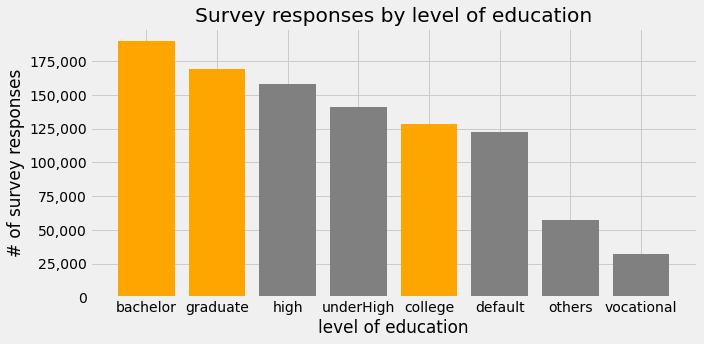

In [62]:
colors_edu = ['grey' for c in range(8)]
colors_edu[0] = 'orange'
colors_edu[1] = 'orange'
colors_edu[4] = 'orange'

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(education.index, education, color=colors_edu)
ax.set_title('Survey responses by level of education')
ax.set_ylabel('# of survey responses')
ax.set_xlabel('level of education')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
fig.tight_layout()

### point out that college educated people have the highest participation - mention that MIT might have targeted other universities - use different color

In [66]:
pdf_agelimit = pdf_survey[(pdf_survey['Review_age'] > 10) & (pdf_survey['Review_age'] < 70)]

<ipython-input-69-26a3302b49c3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


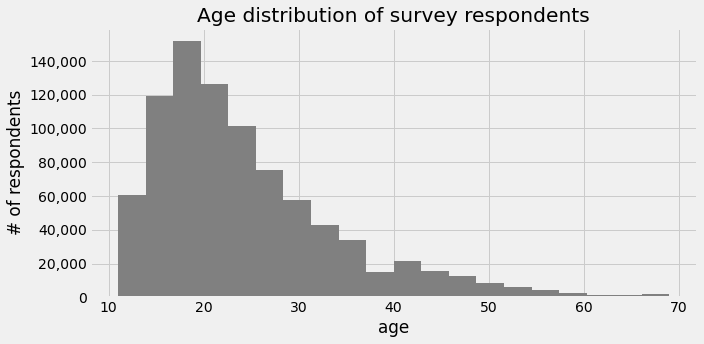

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(pdf_agelimit['Review_age'], bins=20, color='grey')
ax.set_title('Age distribution of survey respondents')
ax.set_xticks(range(10,80,10))
ax.set_xlabel('age')
ax.set_ylabel('# of respondents')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
fig.tight_layout()

In [70]:
device_used = pdf_survey.groupby('Template').count()['ResponseID'].sort_values(ascending=False)
device_used

Template
Desktop    740160
Mobile     259805
Name: ResponseID, dtype: int64

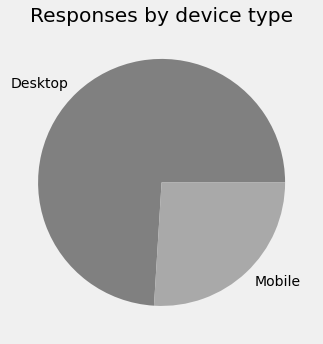

In [71]:
fig, ax = plt.subplots(figsize=(20,5))
ax.pie(device_used, labels=device_used.index, colors=['grey','darkgrey'])
ax.set_title('Responses by device type')
fig.tight_layout()

In [72]:
religious = pdf_survey.groupby('Review_religious').count()['ResponseID'].sort_values(ascending=False)
religious

Review_religious
0.0    402587
1.0     41226
Name: ResponseID, dtype: int64

In [73]:
political = pdf_survey.groupby('Review_political').count()['ResponseID'].sort_values(ascending=False)
political

Review_political
1.0    144656
0.0     47310
Name: ResponseID, dtype: int64

In [245]:
income = pdf_survey.groupby('Review_income').count()['ResponseID'].sort_values(ascending=False)
income

Review_income
50000.0    6969
5000.0     6698
15000.0    6276
35000.0    6252
25000.0    5442
10000.0    5124
80000.0    3129
Name: ResponseID, dtype: int64

In [194]:
scenario_type = pdf_survey.groupby('ScenarioType')['DefaultChoiceOmission'].mean()
scenario_type

ScenarioType
Age              0.477475
Fitness          0.448220
Gender           0.499735
Random                NaN
Social Status    0.546770
Species          0.497504
Utilitarian      0.496832
Name: DefaultChoiceOmission, dtype: float64

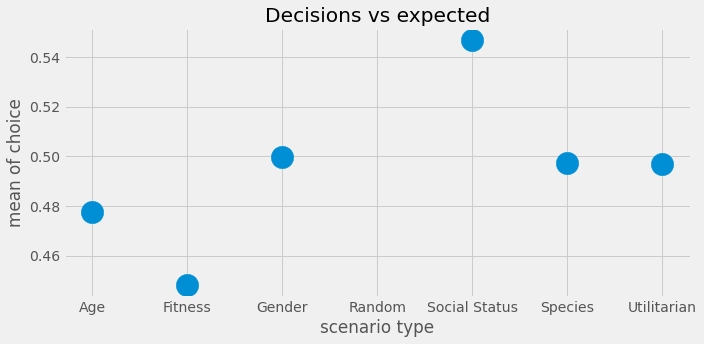

In [438]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(scenario_type.index, scenario_type, s=500)
ax.set_title('Decisions vs expected')
ax.set_ylabel('mean of choice')
ax.set_xlabel('scenario type')
fig.tight_layout()

In [ ]:
# make clear what this means? "WHO would you kill?"